# Import

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import numpy as np
import math
import itertools 
import pandas as pd
import numpy as np
import io
import msoffcrypto
from sklearn.metrics import r2_score
import openpyxl
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import streamlit as st
import json
from math import factorial as fact
from IPython.display import Markdown, display
import toml
import sys, os
import collections
from types import SimpleNamespace
import copy
import matplotlib.patches as mpatch
%matplotlib inline 
%config Completer.use_jedi = True

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

from utils import *

# Run

## Algo

In [2]:
file = {'SheetMapName' : 'map', 'uploaded_file' : "data.xlsx"}
# file = {'SheetMapName' : 'map', 'uploaded_file' : None, 'DistFactor' : 0.1}
file = {'SheetMapName' : 'map bis', 'uploaded_file' : None, 'DistFactor' : 0.1}
algo = load_data_brut(file)
# algo.dfmap

Init algo namespace
[('E0', 'E1'), ('E0', 'E2'), ('E0', 'E3'), ('E1', 'E2'), ('E1', 'E3'), ('E2', 'E3')]
['confs', 'map', 'map bis', 'map (2)', 'map (3)']


## Plot

## ALL

(10, 7)


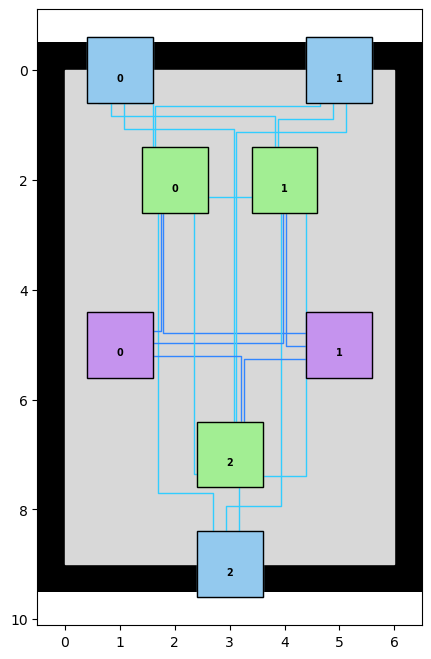

In [73]:
# Plot all
SelectLine = algo.DictLine.keys()
SelectSlot = algo.DictPos.keys()

fig = new_plot(algo, SelectLine, SelectSlot)

# GEN test

In [ ]:
# columns de l'algo genetique
col = ['Clist', 'CtoE', 'Econnect', 'Elist', 'Ecount', 'EtoP', 'Pconnect','Plist', 'Pcount']

In [ ]:
# crossover
dfparents = df[:2].copy()
dfcrossover = pd.DataFrame(AG_CrossOver(dfparents, algo))
dfresults  = pd.concat([dfparents.T,dfcrossover.T ], axis = 1)
dfresults.columns = ['parent1','parent2','enfant1','enfant2']
dfresults.loc[col]

In [ ]:
# mutation
row = df.iloc[0].copy()
dfMutation = pd.Series(Mutation(row, algo))[col]
dfresults  = pd.concat([row,dfMutation], axis = 1)
dfresults.columns = ['parent','enfant']
dfresults.loc[col]

## new formule vrac

In [ ]:
df.columns
indiv = algo.indivs[0]
Calcul_Debit(algo ,indiv, Split = algo.Split)

In [ ]:
Calcul_Debit(algo ,indiv, 'Deactivate')

In [ ]:
debitinput = {'p': 0, 'e': 0, 'ClistG': [0, 1, 3], 'pt': 'Pa'}
debit(algo,indiv,debitinput, grouped = True, split = False)

In [ ]:
pompe,ev,ClistG,pt = debitinput.values()
d_EtoC_list = np.array([algo.dist['E{}-C{}'.format(ev,c)] for c in ClistG])
d_PtoE      = indiv['dist_Connect']['P{}-E{}'.format(pompe,ev)]
d_EtoC_list, d_PtoE
d_EtoC_list = [1,1,1]
d_PtoE = 1
p = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
p
grouped = True
split = False
cE0 = 7.64e-04
coef_E = 0 if split else cE0

coef_C  = 0.036
coef_C  = [algo.Nvals[i] for i in ClistG]
coef_C  = np.array(coef_C)
coef_d_EtoC  = 2.35e-04
coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(ev,c)] for c in ClistG])
# coef_d_PtoE = algo.duriteVal['P{}-E{}'.format(pompe,ev)] 
coef_d_PtoE = indiv['duriteVal']['P{}-E{}'.format(pompe,ev)] 
a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
coef_E ,d_EtoC_list,  coef_d_EtoC, coef_C
A

In [ ]:
Q = 40
A*10
a * Q**2 + b*Q +c - coef_d_PtoE*Q**2
a * Q**2 + b*Q +c - coef_d_PtoE


In [ ]:
coef_E
Ncg=  6
Ncm = 12
d_EtoC_list = np.ones(Ncm) * 1
coef_d_EtoC = np.ones(Ncm) * 0.000235
coef_C = np.ones(Ncm) * 0.036
a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
Q0 = np.arange(0.1,80,0.1)
Qx = np.zeros(Q0.shape)
Qi = np.zeros((12,len(Q0)))
Nev = int(Ncm/6)
for i in range(Nev):
    Q = Q0 - Qx
    # Q.shape, Qx.sum()    
    # Q = Q0.copy()
    # Q.shape
    G = a * Q**2 + b*Q +c - coef_d_PtoE*(i+1)*Q**2
    G[G <0] = 0
    # print(G)
    Qi[i*Ncg:Ncg*(i+1),:] = np.sqrt(G / A[i*Ncg:Ncg*(i+1),np.newaxis]).round(3)
    Qx = Qi[0:Ncg*(i+1),:].sum(0)
    # Qx
    # pd.DataFrame(Qi)
    # Qx.shape
    f = plt.plot(Qx)
    # Qi.shape
dfr = pd.DataFrame(Qi).T
dfr.index = Q0
idx = np.searchsorted(Q0 - Qi.sum(0), 0)
np.isclose(Qi.sum(0),Q0,atol= 0.1).sum()
# np.isclose(Qi.sum(0),Q,atol= 0.1)
idx, Q[idx],Qi[:,idx], Qi.shape, G[idx]

In [ ]:
a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
a,b,c

In [ ]:

Q = np.arange(0.1,80,0.1)
G = a * Q**2 + b*Q +c - coef_d_PtoE
Qi= np.sqrt(G / A[:,np.newaxis])
Q[np.isclose(Qi.sum(0),Q,atol= 0.1)]
Qi[:,np.isclose(Qi.sum(0),Q,atol= 0.1)]
idx = np.searchsorted(Q - Qi.sum(0), 0)
Q[idx],Qi[:,idx]
Qi.shape
# Q[np.isclose(Qi.sum(0),Q,atol= 0.1)]

In [ ]:
%timeit np.isclose(Qi.sum(0),Q,atol= 0.1)
%timeit np.searchsorted(Q - Qi.sum(0), 0.1)


In [ ]:
Qi.sum(0) - Q

In [ ]:
%%timeit
G = a * Q**2 + b*Q +c - coef_d_PtoE
Qi= np.sqrt(G / A[:,np.newaxis])


In [ ]:
p = np.array(p)

In [ ]:
%%timeit
Q = 40
Qs = []
for i in range(40):
    G = a * Q**2 + b*Q +c - coef_d_PtoE
    Qi= np.sqrt(G / A)
    Q = np.sum(Qi)
    Qs.append(Q)

In [ ]:

Q = 40
Qs = []
for i in range(40):
    G = a * Q**2 + b*Q +c - coef_d_PtoE
    Qi= np.sqrt(G / A)
    Q = np.sum(Qi)
    Qs.append(Q)
plt.plot(Qs)
Qs[-1]
# Qi


In [ ]:
indiv['dist_Connect']
A

In [ ]:
pd.Series(indiv)

# Final loop 

## test bus  T

In [3]:
indiv['BusName']

NameError: name 'indiv' is not defined

(10, 7)


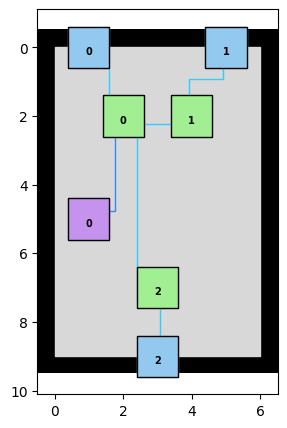

In [7]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = ['E0-C0', 'E1-C1', 'E2-C2', 'P0-E0', 'E1-E0', 'E2-E0']                
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

In [88]:
dist_Connect = indiv['dist_Connect']
New_dist_Connect = copy.deepcopy(dist_Connect)
BusName = copy.deepcopy(indiv['Name'])
Pconnect = copy.deepcopy(indiv['Pconnect'])

dfx0 = algo.dfline.copy()
dfx0['a'] = dfx0.ID.str.split('-').str[0]
dfx0['b'] = dfx0.ID.str.split('-').str[1]

NameListNew  = []
DictMapName = {}
BusConnectDict = []

for i, (p,Elist) in enumerate(Pconnect.items()): 
    break
# p,Elist = Pconnect.items()  
print(i, (p,Elist))
# Elist.pop(1)

s = 'P{}'.format(p)
ElistName = ['E{}'.format(e) for e in Elist]
ListMask = [s] + ElistName
ListMask
mask0 = dfx0.a.isin(ListMask) & dfx0.b.isin(ListMask)
dfx = dfx0[mask0].copy()
path,dist,lines = [s] ,[], []
# pour chaque slot de P commence avec s = Px et avance par iter sur le plus proche E & crop  dfx = dfline 
# l'astuce c'est que qu'on conserve les lines P-E mais en changeant les valeurs de dist

while len(dfx)>0:
    dfx
    mask = dfx.ID.str.contains(s)
    x  = dfx[mask].dist.values.argmin()    
    cx = dfx[mask][['a','b']].iloc[x].values
    cx
    line = dfx[mask].iloc[x].ID
    lines.append(line)
    NameListNew.append(line)
    dist.append(dfx[mask].dist.values.min())    
#     dfx = dfx[~mask]
    s2 = cx[cx!=s][0]
    s2
    mask = dfx.ID.str.contains(s2)
    dfx = dfx[~mask]
#     dfx
    path.append(s2)
    
path
lines
# distCumsum = np.array(dist).cumsum()
# PxConnect = ['{}-{}'.format(path[0],s) for s in path[1:]]
# DictMapName.update(dict(zip(PxConnect,lines)))
# # print(p,Elist, PxConnect)   
# d = dict(zip(PxConnect,distCumsum))
# #     BusConnectDict[p].append()
# New_dist_Connect.update(d)
# print('bus',path[0], p,Elist, PxConnect,path,lines,dist, distCumsum, New_dist_Connect)

0 (0, [0, 1, 2])


['P0', 'E0', 'E1', 'E2']

,ID,path,dist,duriteType,duriteVal,a,b
3,P0-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E0
8,P0-E1,"[[2, 4], [3, 4], [4, 4], [5, 4], [5, 3], [5, 2...",0.6,4,0.000235,P0,E1
13,P0-E2,"[[7, 3], [6, 3], [5, 3], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E2
15,E1-E0,"[[2, 2], [2, 3], [2, 4]]",0.2,4,0.000235,E1,E0
16,E2-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2...",0.6,4,0.000235,E2,E0
17,E2-E1,"[[2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4...",0.6,4,0.000235,E2,E1


array(['P0', 'E0'], dtype=object)

'E0'

,ID,path,dist,duriteType,duriteVal,a,b
8,P0-E1,"[[2, 4], [3, 4], [4, 4], [5, 4], [5, 3], [5, 2...",0.6,4,0.000235,P0,E1
13,P0-E2,"[[7, 3], [6, 3], [5, 3], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E2
17,E2-E1,"[[2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4...",0.6,4,0.000235,E2,E1


array(['P0', 'E2'], dtype=object)

'E2'

,ID,path,dist,duriteType,duriteVal,a,b
8,P0-E1,"[[2, 4], [3, 4], [4, 4], [5, 4], [5, 3], [5, 2...",0.6,4,0.000235,P0,E1


array(['P0', 'E1'], dtype=object)

'E1'

['P0', 'E0', 'E2', 'E1']

['P0-E0', 'P0-E2', 'P0-E1']

In [58]:
tuple(Pconnect.items())

((0, [0, 1, 2]),)

In [75]:
Pconnect

{0: [0, 2]}

## indiv

### Bus (commentaire) a lire !!!

In [4]:
algo.Group = True
algo.GroupDict = [1,0,1,2,2]
algo.GroupDict = [1,0,1,0,0]

In [5]:
algo.BusActif = True
algo.Npc = 0
# indiv  = Indiv_reverse('E0-C0,E0-C1,E2-C2,P0-E0,P0-E1,P0-E2',algo)
indiv  = Indiv_reverse('E0-C0,E1-C1,E1-C3,E2-C4,E0-C2,P0-E0,P0-E1,P0-E2',algo)
indiv['Pconnect']

Indiv_reverse [0, 1, 2, 3, 4] [0, 1, 0, 1, 2] [0, 0, 0]
0 (0, [0, 1, 2])
bus P0 0 [0, 1, 2] ['P0-E2', 'P0-E0', 'P0-E1'] ['P0', 'E2', 'E0', 'E1'] ['P0-E2', 'E2-E0', 'E1-E0'] [0.2, 0.4, 0.2] [0.2 0.6 0.8] ['P0-E2', 'P0-E0', 'P0-E1']


{0: [0, 1, 2]}

In [6]:
Cconnect =  { v: k for k, l in indiv['Econnect'].items() for v in l }
Cconnect

{0: 0, 2: 0, 1: 1, 3: 1, 4: 2}

In [7]:
indiv['BusConnectDict']

[{'p': 0, 'e': [2, 0, 1]}]

In [8]:
# !!!  A REFAIRE
GroupDict = algo.GroupDict
# GroupDict
Econnect = indiv['Econnect']
Ptype = indiv['Ptype']
IndivLine = []
DictX = {}
indiv['BusConnectDict']
# loop sur BusConnectDict generer via func bus_connection qui doit prendre en compte le remove des PtoE 
# list les mutiple connection au meme slot de pompe = remove ou autre solution 
for d in indiv['BusConnectDict']:
#     GrList = []
    p, Elist = d.values()
    pt = 'Pa'   # !!! probleme retrouver pt qui est indexé differement noramleemnt Ptype[i]
    gr = collections.defaultdict(list)
    # on fait 1 le dict des group par {gr : c}  
    for e in Elist:
        for c in indiv['Econnect'][e]:
            gr[GroupDict[c]].append(c) 
    gr = dict(gr)
    print(gr, sorted(gr))
    # etape la plus bizarre on utile le nouveau Connect pour organiser les ev dans l'ordre et par groupe pour juste lister ensuite dans calcul debit
    for n in sorted(gr): # pas sur quie le sorted serve a quelque chose 
        g = gr[n]
        d = collections.defaultdict(list)
        for c in g :
            e = Cconnect[c]
            d[e].append(c)
        DictX[n] = dict(d)
        
        
    conf = dict(
        ty = '',
        p = p,
        e = Elist,
        gr = gr,
        pt = 'Pa',
        bus = DictX
    )
    IndivLine.append(conf)
IndivLine

[{'p': 0, 'e': [2, 0, 1]}]

{0: [4, 1, 3], 1: [0, 2]} [0, 1]


[{'ty': '',
  'p': 0,
  'e': [2, 0, 1],
  'gr': {0: [4, 1, 3], 1: [0, 2]},
  'pt': 'Pa',
  'bus': {0: {2: [4], 1: [1, 3]}, 1: {0: [0, 2]}}}]

(10, 7)


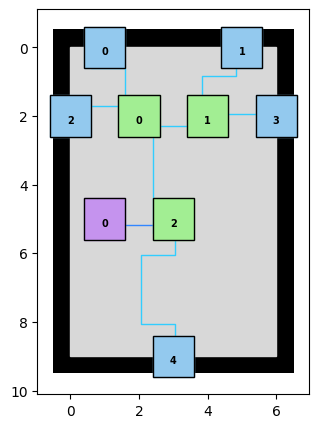

In [9]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = row.BusName                
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

#### Save

### Non bus

In [15]:
algo.Group = True
algo.GroupDict = [1,1,0]

In [16]:
algo.BusActif = False
algo.Npc = 0

indiv  = Indiv_reverse('E0-C0,E0-C1,E0-C2,P0-E0',algo)
indiv['dist_Connect']
indiv['BusDist']
indiv['Pconnect']
indiv['Econnect']
# Calcul_Debit(algo ,indiv, 'Deactivate')

Indiv_reverse [0, 1, 2] [0, 0, 0] [0]


{'E0-C0': 0.3, 'E0-C1': 0.5, 'E0-C2': 0.8, 'P0-E0': 0.4}

([],)

{0: [0]}

{0: [0, 1, 2]}

In [17]:
def Indiv_Conf(algo, indiv): 
    GroupDict = algo.GroupDict
    # GroupDict
    Econnect = indiv['Econnect']
    Ptype = indiv['Ptype']
    IndivLine = []
    for i, (p,Elist) in enumerate(indiv['Pconnect'].items()):
        pt = Ptype[i]
        for e in Elist:
            gr = collections.defaultdict(list)
            for c in indiv['Econnect'][e]:
                gr[GroupDict[c]].append(c)       

            conf = dict(
                ty = '',
                p = p,
                e = e,
                gr = gr,
                pt = pt,
            )
            IndivLine.append(conf)
    return IndivLine

In [19]:
GroupDict = algo.GroupDict
# GroupDict
Econnect = indiv['Econnect']
Ptype = indiv['Ptype']
IndivLine = []
for i, (p,Elist) in enumerate(indiv['Pconnect'].items()):
    pt = Ptype[i]
    for e in Elist:
        gr = collections.defaultdict(list)
        for c in indiv['Econnect'][e]:
            gr[GroupDict[c]].append(c)       
        
        conf = dict(
            ty = '',
            p = p,
            e = e,
            gr = gr,
            pt = pt,
        )
        print(conf)
        IndivLine.append(conf)
IndivLine
for conf in IndivLine: 
    ty, p, e, gr, pt = conf.values()
    for g,ClistG in gr.items():
        ClistG
        if g == 0 : grouped = False
        else : grouped = True
        debitinput = dict(
            p = p,
            e = e,
            ClistG = ClistG,
            pt = pt,             
        )    
        debit(algo,indiv,debitinput, grouped = grouped, split = False)    

{'ty': '', 'p': 0, 'e': 0, 'gr': defaultdict(<class 'list'>, {1: [0, 1], 0: [2]}), 'pt': 'Pa'}


[{'ty': '',
  'p': 0,
  'e': 0,
  'gr': defaultdict(list, {1: [0, 1], 0: [2]}),
  'pt': 'Pa'}]

[0, 1]

{'Qt': 21.49,
 'Pt': 4.26,
 'Qi': array([10.75, 10.74]),
 'Pi': array([4.16, 4.16])}

[2]

{'Qt': array([11.18]),
 'Pt': array([4.62]),
 'Qi': array([11.18]),
 'Pi': array([4.5])}

(10, 7)


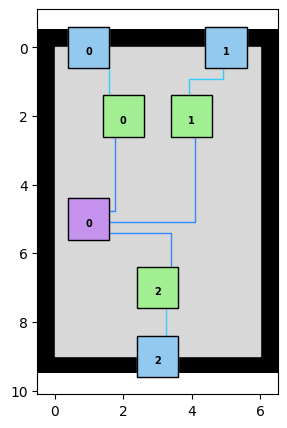

In [19]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = row.BusName                
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

In [131]:
indiv['BusName'] 
indiv['BusDist']
indiv['dist_Connect']

['E0-C0', 'E0-C1', 'E1-C2', 'P0-E0', 'P1-E1']

{'E0-C0': 0.5, 'E0-C1': 0.4, 'E1-C2': 0.4, 'P0-E0': 0.3, 'P1-E1': 0.3}

{'E0-C0': 0.5, 'E0-C1': 0.4, 'E1-C2': 0.4, 'P0-E0': 0.3, 'P1-E1': 0.3}

In [39]:
indiv

{'Clist': [0, 1, 2],
 'CtoE': [0, 1, 2],
 'Econnect': {0: [0], 1: [1], 2: [2]},
 'Elist': [0, 1, 2],
 'Ecount': 3,
 'EtoP': [0, 0, 0],
 'Pconnect': {0: [0, 2]},
 'Plist': [0],
 'Pcount': 1,
 'Ptype0': array(['Pa', 'Pa', 'Pa'], dtype='<U2'),
 'List_EtoC': [['E0-C0'], ['E1-C1'], ['E2-C2']],
 'List_PtoE': [['P0-E0', 'P0-E1', 'P0-E2']],
 'Name': ['E0-C0', 'E1-C1', 'E2-C2', 'P0-E0', 'P0-E1', 'P0-E2'],
 'ID': 10,
 'parent': [],
 'Name_txt': 'E0-C0,E1-C1,E2-C2,P0-E0,P0-E1,P0-E2',
 'Epoch': 0,
 'Option': 'Bus',
 'Ptype': ['Pa', 'Pa', 'Pa'],
 'dist_Connect': {'E0-C0': 0.3,
  'E1-C1': 0.3,
  'E2-C2': 0.2,
  'P0-E0': 0.4,
  'P0-E1': 0.6,
  'P0-E2': 1.0},
 'dist': 240,
 'BusName': ['E0-C0', 'E1-C1', 'E2-C2', 'P0-E0', 'P0-E1', 'E2-E0'],
 'BusDist': {'E0-C0': 0.3,
  'E1-C1': 0.3,
  'E2-C2': 0.2,
  'P0-E0': 0.4,
  'P0-E1': 0.6,
  'P0-E2': 0.6},
 'PtypeCo': {0: ['Pa', 'Pa', 'Pa']},
 'PompesCo': {0: ['Pa']},
 'PompeCount': {'P0': {'Pa': 1}},
 'PompeSum': {'Pa': 1},
 'duriteVal': {'E0-C0': 0.000235,
  '

## test unitaire comme sur tableau excel 

In [12]:
debitinput ={'p': 0, 'e': 0, 'ClistG': [0], 'pt': 'Pa'}
pompe,ev,ClistG,pt = debitinput.values()
d_EtoC_list = np.array([algo.dist['E{}-C{}'.format(ev,c)] for c in ClistG])
d_PtoE      = indiv['dist_Connect']['P{}-E{}'.format(pompe,ev)]
d_EtoC_list, d_PtoE
d_EtoC_list = [1,1,1]
d_PtoE = 1
p = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
p
grouped = True
split = False
cE0 = 7.64e-04
coef_E = 0 if split else cE0

coef_C  = 0.036
coef_C  = [algo.Nvals[i] for i in ClistG]
coef_C  = np.array(coef_C)
coef_d_EtoC  = 2.35e-04
coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(ev,c)] for c in ClistG])
# coef_d_PtoE = algo.duriteVal['P{}-E{}'.format(pompe,ev)] 
coef_d_PtoE = indiv['duriteVal']['P{}-E{}'.format(pompe,ev)] 
a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
coef_E ,d_EtoC_list,  coef_d_EtoC, coef_C
a,b,c
A

(array([0.3]), 0.4)

[-0.000516, -0.0154, 4.87]

(0.000764, [1, 1, 1], array([0.000235]), array([0.036]))

(-0.000516, -0.0154, 4.87)

array([0.036999, 0.036999, 0.036999])

In [28]:
%%timeit
Ncg=  2
Ncm = 4
cE0 = 7.64e-04
coef_E =  cE0
d_EtoC_list = np.ones(Ncg) * 1
coef_d_EtoC = np.ones(Ncg) * 0.000235
coef_C      = np.ones(Ncg) * 0.036
# A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 

Q0 = np.arange(0.1,80)
Qx = np.zeros(Q0.shape)
# Qi = np.zeros((Ncm,len(Q0)))
Qi = []

G = a * Q0**2 + b*Q0 +c
Nev = int(Ncm/Ncg)
coef_d_PtoE = np.ones(Nev) * 0.000235
Qlist = []

for i in range(Nev):
    G = G - coef_d_PtoE[i]*(Q0-Qx)**2
    G[G <0] = 0
    A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
    Qlist.append(np.sqrt(G / A[:,np.newaxis]))
    Qi = np.vstack(Qlist)
    Qx = Qi.sum(0)
#     Qi.shape
#     Qi[i*Ncg:Ncg*(i+1),:] = np.sqrt(G / A[i*Ncg:Ncg*(i+1),np.newaxis])
#     Qx = Qi.sum(0)

idx = np.searchsorted(Q0 - Qx, -0)
idx,Q0[idx],Qx[idx]

# idx, Q0[idx],Qx[idx], Qi[:,idx], Qi.shape, G[idx]

83.3 µs ± 728 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
%%timeit
Ncg=  6
Ncm = 60
cE0 = 7.64e-04
coef_E =  cE0
d_EtoC_list = np.ones(Ncg) * 1
coef_d_EtoC = np.ones(Ncg) * 0.000235
coef_C      = np.ones(Ncg) * 0.036
# A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 

Q0 = np.arange(0.1,80)
Qx = np.zeros(Q0.shape)
# Qi = np.zeros((Ncm,len(Q0)))
Qi = []

G = a * Q0**2 + b*Q0 +c
Nev = int(Ncm/Ncg)
coef_d_PtoE = np.ones(Nev) * 0.000235
Qlist = []

for i in range(Nev):
    G = G - coef_d_PtoE[i]*(Q0-Qx)**2
    G[G <0] = 0
    A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
    Qlist.append(np.sqrt(G / A[:,np.newaxis]))
    Qi = np.vstack(Qlist)
    Qx = Qi.sum(0)
#     Qi.shape
#     Qi[i*Ncg:Ncg*(i+1),:] = np.sqrt(G / A[i*Ncg:Ncg*(i+1),np.newaxis])
#     Qx = Qi.sum(0)

idx = np.searchsorted(Q0 - Qx, -0)
idx,Q0[idx],Qx[idx]

# idx, Q0[idx],Qx[idx], Qi[:,idx], Qi.shape, G[idx]

351 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


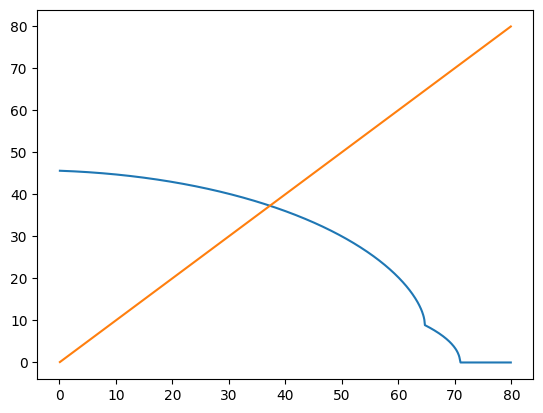

In [18]:
f = plt.plot(Q0,Qx)
f = plt.plot(Q0,Q0)

## debit test unitaire indiv 

In [63]:
indiv['duriteVal']

{'E0-C0': 0.000235,
 'E0-C1': 0.000235,
 'E2-C2': 0.000235,
 'P0-E0': 0.000235,
 'P0-E2': 0.000235}

In [ ]:
indiv['']

In [36]:
IndivLine

[{'ty': '',
  'p': 0,
  'e': [0, 2],
  'gr': defaultdict(list, {1: [0, 2], 0: [1]}),
  'pt': 'Pa',
  'bus': {0: {0: [1]}, 1: {0: [0], 2: [2]}}}]

In [102]:
# %%timeit
ClistDict = {0:[0,1,2], 1:[3]}
ClistDict = {0:[0,1], 1 : [2]}
ClistDict = {0:[0,1]}
ClistDict = {1:[2], 0: [0,1]}
 
PtoElist = ['P0-E0','P0-E2']
line = IndivLine[0]
ClistDict = line['bus'][1]
PtoElist = ['P{}-E{}'.format(0,e) for e in line['e']]
EvList = [0,1]
pompe = 0
# coef_PtoE = [indiv['duriteVal'][line] * indiv['BusDist'][line] for line in PtoElist]
# coef_PtoE
coef_PtoE = [indiv['duriteVal'][line] * indiv['BusDist'][line] for line in PtoElist]
pt = 'Pa'
Q0 = np.arange(0.1,80,0.1)
Qx = 0

a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
G = a * Q0**2 + b*Q0 +c

Qlist = []
Alist = []
for i, (e,EClist) in enumerate( ClistDict.items()): # changer en list pour avoir l'ordre !!
    print(i, e,EClist)
    coef_C  = [algo.Nvals[i] for i in EClist]
    coef_C  = np.array(coef_C)
    d_EtoC = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in EClist])
    coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(e,c)] for c in EClist])
    coef_E = 7.64e-04  
#     print(d_EtoC)

    G = G - coef_PtoE[i]*(Q0-Qx)**2
    G[G<0] = 0
    A = coef_E + d_EtoC * coef_d_EtoC + coef_C 
    print(coef_E ,d_EtoC , coef_d_EtoC ,coef_C,  A)
    Alist.append(A)
    Qlist.append(np.sqrt(G / A[:,np.newaxis]))
    Qi = np.vstack(Qlist)  # a essayer de passer en append coté numpy 
    Qx = Qi.sum(0)
#     Qi.shape
idx = np.searchsorted(Q0 - Qx, -1)
# idx
Qi = np.vstack(Qlist)[:,idx]
Qi
# Alist
'Alist',Alist
Pi = np.concatenate(Alist)* (Qi**2)
Pi

0 0 [0, 2]
0.000764 [0.3 0.2] [0.000235 0.000235] [0.036 0.036] [0.0368345 0.036811 ]


array([10.81708505, 10.82053729])

('Alist', [array([0.0368345, 0.036811 ])])

array([4.30998013, 4.30998013])

In [188]:
Calcul_Debit(algo ,indiv, 'Deactivate')

{'p': 0, 'e': 0, 'ClistG': [0, 1], 'pt': 'Pa'}
{'p': 0, 'e': 1, 'ClistG': [2], 'pt': 'Pa'}


{'PressionList': [4.5, 4.5, 4.52],
 'DebitList': [11.18, 11.18, 11.2],
 'Esplit': {0: [0, 1], 1: [2]},
 'Debit': 33.6}

In [30]:
indiv['Econnect'], indiv['Pconnect']
indiv['List_EtoC']
indiv['List_PtoE']

({0: [0, 1], 1: [2]}, {0: [0, 1]})

[['E0-C0', 'E0-C1'], ['E1-C2']]

[['P0-E0', 'P0-E1']]

## conf indiv line  echec 

In [ ]:
{'ty': '',
 'p': 0,
 'e': [0, 2],
 'gr': defaultdict(list, {1: [0, 2], 0: [1]}),
 'pt': 'Pa',
 'bus': {0: {0: [1]}, 1: {0: [0], 2: [2]}}}

In [45]:
d = {'data' : 
     [
         {'ty': 'bus',
          'p': 0,
          'e': [0, 2],
          'gr': {1: [0, 2], 0: [1]},
          'pt': 'Pa',
          'bus': {0: {0: [1]}, 1: {0: [0], 2: [2]}}}]}

In [47]:
with open('indivconf.json', 'w') as outfile:
    json.dump(d, outfile)

In [ ]:
json.

## func (2ieme partie a lire) 

In [10]:

line = IndivLine[0]
line
# loop sur les gr avec les clisdict d'avant  
for n , ClistDict in line['bus'].items():
    # ClistDict = line['bus'][1]
    PtoElist = ['P{}-E{}'.format(0,e) for e in line['e']]
    EvList = [0,1]
    pompe = 0 # a changer 
    coef_PtoE = [indiv['duriteVal'][line] * indiv['BusDist'][line] for line in PtoElist] # tres important puisque ordre de calucl a respecter 
    pt = 'Pa'
    Q0 = np.arange(0.1,80,0.1)
    Qx = 0

    a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
    G = a * Q0**2 + b*Q0 +c

    Qlist = []
    Alist = []
    for i, (e,EClist) in enumerate( ClistDict.items()): # changer en list pour avoir l'ordre !!
        print(i, e,EClist)
        # calcul des coef comme avant 
        coef_C  = [algo.Nvals[i] for i in EClist]
        coef_C  = np.array(coef_C)
        d_EtoC = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in EClist])
        coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(e,c)] for c in EClist])
        coef_E = 7.64e-04  

        
        # new si pas de capteur on a juste le coef de droite = 0 normalement le truc c'est quil faudra faire cette loop dans le cas de group ou le premier Ev dn'est pas activer 
        # donc prendre en compte pour le calcul de coef_PtoE
        G = G - coef_PtoE[i]*(Q0-Qx)**2
        G[G<0] = 0
        A = coef_E + d_EtoC * coef_d_EtoC + coef_C 
        print(coef_E ,d_EtoC , coef_d_EtoC ,coef_C,  A)
        Alist.append(A)
        # magie on tile la mtrice sur A step correspond au tableau excel etendu sur la droite
        Qlist.append(np.sqrt(G / A[:,np.newaxis]))
        Qi = np.vstack(Qlist)  # a essayer de passer en append coté numpy 
        Qx = Qi.sum(0)
    #     Qi.shape
    # le offset de -1 pour retrouver la plus proche valeur de Q0 -Qx facile 
    idx = np.searchsorted(Q0 - Qx, -1)
    # idx
    Qi = np.vstack(Qlist)[:,idx]
    Qi
    # Alist
    'Alist',Alist
    Pi = np.concatenate(Alist)* (Qi**2)
    Pi

{'ty': '',
 'p': 0,
 'e': [2, 0, 1],
 'gr': {0: [4, 1, 3], 1: [0, 2]},
 'pt': 'Pa',
 'bus': {0: {2: [4], 1: [1, 3]}, 1: {0: [0, 2]}}}

0 2 [4]
0.000764 [0.6] [0.000235] [0.036] [0.036905]
1 1 [1, 3]
0.000764 [0.3 0.2] [0.000235 0.000235] [0.036 0.036] [0.0368345 0.036811 ]


array([10.2881034 , 10.2501759 , 10.25344721])

('Alist', [array([0.036905]), array([0.0368345, 0.036811 ])])

array([3.90621237, 3.87005748, 3.87005748])

0 0 [0, 2]
0.000764 [0.3 0.2] [0.000235 0.000235] [0.036 0.036] [0.0368345 0.036811 ]


array([10.81708505, 10.82053729])

('Alist', [array([0.0368345, 0.036811 ])])

array([4.30998013, 4.30998013])

# Calcul debit 

In [123]:
 D = algo.Comb  
Group = algo.Group
GroupDict = algo.GroupDict 
# print(GroupDict)
Clist = D['C']
Econnect = indiv['Econnect']
Pconnect = indiv['Pconnect']
dist_Connect = indiv['dist_Connect']
EtoP = indiv['EtoP']
Ptype = indiv['Ptype']
Pression = []
Debit = []

Cpression = {}
Cdebit = {}

In [127]:
GroupDict

[0, 1, 1]

In [126]:
indiv['Option']

'Bus'

In [125]:
GroupDict , Econnect, Pconnect

d1 = collections.defaultdict(list)
d2 = collections.defaultdict(list)
for i, (e,EClist) in enumerate(Econnect.items()):
    for e2 in EClist :
        d2

([0, 1, 1], {0: [0, 1], 1: [2]}, {0: [0, 1]})

# SAVE

In [ ]:
# bourrin 
Ncg=  4
Ncm = 8
cE0 = 7.64e-04
coef_E =  cE0
d_EtoC_list = np.ones(Ncm) * 1
coef_d_EtoC = np.ones(Ncm) * 0.000235
coef_C      = np.ones(Ncm) * 0.036
A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 

Q0 = np.arange(0.1,80,0.1)
Qx = np.zeros(Q0.shape)
Qi = np.zeros((Ncm,len(Q0)))

G = a * Q0**2 + b*Q0 +c
Nev = int(Ncm/Ncg)
coef_d_PtoE = np.ones(Nev) * 0.000235
for i in range(Nev):
    G = G - coef_d_PtoE[i]*(Q0-Qx)**2
    G[G <0] = 0
    Qi[i*Ncg:Ncg*(i+1),:] = np.sqrt(G / A[i*Ncg:Ncg*(i+1),np.newaxis])
    Qx = Qi.sum(0)

idx = np.searchsorted(Q0 - Qx, -0.9)

idx, Q0[idx],Qx[idx]#, Qi[:,idx], Qi.shape, G[idx]